In [1]:
from amp import Amp
from amp.descriptor.gaussian import Gaussian
from amp.model.neuralnetwork import NeuralNetwork
import ase.io
import ase.build
from ase.calculators.kim import KIM
from mlipal import descriptors
import numpy as np
import os
import shutil

In [2]:
from si_e_v import generate_volume_series

In [3]:
#kim_calc = 'Tersoff_LAMMPS_Tersoff_1988T3_Si__MO_186459956893_003'
#calc = KIM(kim_calc)

In [4]:
if os.path.exists('amp-fingerprints.ampdb'):
    shutil.rmtree('amp-fingerprints.ampdb')
    #shutil.rmtree('amp-fingerprint-primes.ampdb')
    shutil.rmtree('amp-neighborlists.ampdb')

In [5]:
e_v_structures = generate_volume_series(np.linspace(0.6, 1.3))
random_structures = []
for i in os.listdir('random_structures'):
    random_structures.append(ase.io.read('random_structures/' + i))

In [6]:
#for a in e_v_structures:
#    a.set_calculator(calc)
#    a.get_potential_energy()
#for a in random_structures:
#    a.set_calculator(calc)
#    a.get_potential_energy()

In [7]:
symm_funcs = descriptors.two_body_gaussians(e_v_structures[0]) + descriptors.three_body_gaussians(e_v_structures[0])
descriptor = Gaussian(Gs=symm_funcs, cutoff=3)

In [8]:
calc = Amp(descriptor=descriptor, model=NeuralNetwork())
calc.model.lossfunction.parameters['convergence'].update(
    {'energy_rmse': None,
     'force_maxresid': 100})

In [9]:
#calc.train(e_v_structures)

In [10]:
from amp.descriptor.analysis import FingerprintPlot

Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 41
Si 4

TypeError: 'NoneType' object is not subscriptable

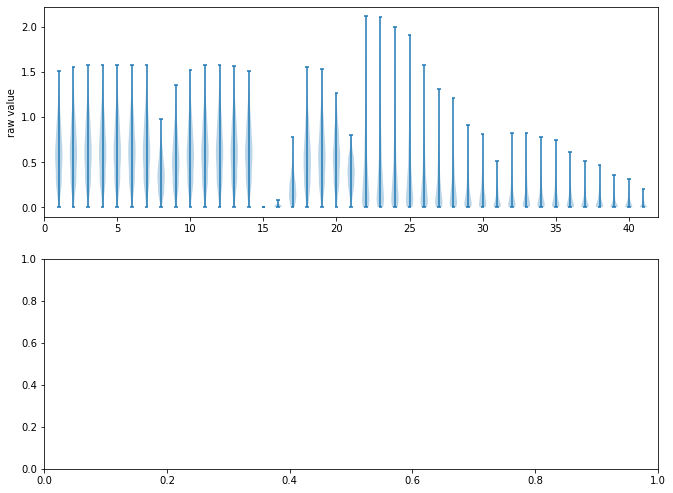

In [11]:
fpplot = FingerprintPlot(calc)
#fpplot(random_structures+e_v_structures, name='random_structures_fp.png')
fpplot(random_structures, name='random_structures_fp.png')